<a href="https://colab.research.google.com/github/sungjindo/black_coal_price/blob/main/blackcoal_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 기본 라이브러리
import pandas as pd
import numpy as np
import os

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
%matplotlib inline

# 통계 및 기계학습 관련 라이브러리
from scipy import stats    # 통계 관련 라이브러리
from sklearn.model_selection import train_test_split, RandomizedSearchCV    # 데이터 셋 분류 라이브러리
from sklearn.utils import resample    # 데이터 업샘플링&다운샘플링 라이브러리
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN    # 복합샘플링 라이브러리
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler    # 데이터 스케일링 라이브러리
from statsmodels.stats.outliers_influence import variance_inflation_factor    # 변수 간 다중공선성 확인(VIF) 라이브러리
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, plot_confusion_matrix, plot_roc_curve)    # 모델 정확도 검증 라이브러리
from sklearn.model_selection import cross_val_score    # validation  검증 라이브러리
from sklearn.linear_model import LogisticRegression    # 로지스틱 회귀 라이브러리
from sklearn.linear_model import Lasso    # 라쏘 라이브러리
from sklearn.linear_model import Ridge    # 릿지 라이브러리
import statsmodels.api as sm    # 통계분석 관련 라이브러리
from xgboost import XGBClassifier    # XGBoost 라이브러리
from sklearn.ensemble import RandomForestClassifier    # 랜덤포레스트 라이브러리
import warnings    # 경고문구 지우기


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
df = pd.read_excel("/content/gdrive/My Drive/Black_coal/data/black_coal.xlsx")

In [5]:
df

,Unnamed: 0,KPPI,ACPI,KCPI,APPI,APPI2
0,2000-01-01,3.1,168.800,1.9,NaN,NaN
1,2000-02-01,3.0,169.800,1.8,NaN,NaN
2,2000-03-01,3.2,171.200,2.1,NaN,NaN
3,2000-04-01,2.4,171.300,1.4,NaN,NaN
4,2000-05-01,1.7,171.500,1.1,NaN,NaN
...,...,...,...,...,...,...
247,2020-08-01,-0.5,259.918,0.8,0.006,123.436202
248,2020-09-01,-0.4,260.280,0.9,0.003,123.806511
249,2020-10-01,-0.4,260.388,0.1,0.004,124.301737
250,2020-11-01,-0.5,260.229,0.6,0.003,124.674642


In [6]:
df= df.rename(columns={'Unnamed: 0':'date'})

In [7]:
# 전체 컬럼명 확인

#pd.set_option('display.max_seq_items', 10)
col_names = df.columns.tolist()
print(df.columns)

Index(['date', 'KPPI', 'ACPI', 'KCPI', 'APPI', 'APPI2'], dtype='object')


In [8]:
df1 = df.set_index("date")
df1

,KPPI,ACPI,KCPI,APPI,APPI2
date,,,,,
2000-01-01,3.1,168.800,1.9,NaN,NaN
2000-02-01,3.0,169.800,1.8,NaN,NaN
2000-03-01,3.2,171.200,2.1,NaN,NaN
2000-04-01,2.4,171.300,1.4,NaN,NaN
2000-05-01,1.7,171.500,1.1,NaN,NaN
...,...,...,...,...,...
2020-08-01,-0.5,259.918,0.8,0.006,123.436202
2020-09-01,-0.4,260.280,0.9,0.003,123.806511
2020-10-01,-0.4,260.388,0.1,0.004,124.301737


In [ ]:
df1.to_csv('/content/gdrive/My Drive/Black_coal/data/blackcoal1.csv', index = False, encoding = 'utf-8-sig')

In [9]:
df_up = df1.resample('W-MON').ffill()
df_up

,KPPI,ACPI,KCPI,APPI,APPI2
date,,,,,
2000-01-03,3.1,168.800,1.9,NaN,NaN
2000-01-10,3.1,168.800,1.9,NaN,NaN
2000-01-17,3.1,168.800,1.9,NaN,NaN
2000-01-24,3.1,168.800,1.9,NaN,NaN
2000-01-31,3.1,168.800,1.9,NaN,NaN
...,...,...,...,...,...
2020-11-09,-0.5,260.229,0.6,0.003,124.674642
2020-11-16,-0.5,260.229,0.6,0.003,124.674642
2020-11-23,-0.5,260.229,0.6,0.003,124.674642


In [10]:
df_up  = df_up.dropna()

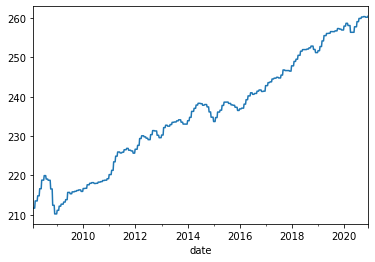

In [11]:
df_up['ACPI'].plot()

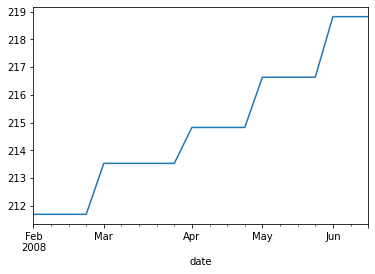

In [12]:
df_up['ACPI'].iloc[:20].plot()

In [13]:
df_up.to_csv('/content/gdrive/My Drive/Black_coal/data/blackcoalt_m_w.csv', index = False, encoding = 'utf-8-sig')

In [24]:
df2 = pd.read_excel("/content/gdrive/My Drive/Black_coal/data/black_coal.xlsx", sheet_name = [2] )

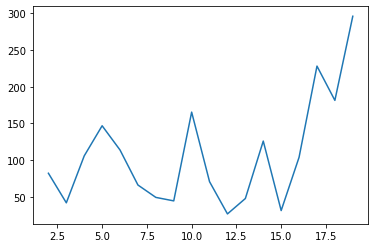

In [25]:
df2[2]['호주 black coal import'].plot()

In [26]:
df_y=df2[2]

In [27]:
df_y = df_y.rename(columns={'국내 1인당 전력소비량':'Kelec'})

In [28]:
df_y= df_y.rename(columns={'Unnamed: 0':'date'})

In [29]:
df_y = df_y.set_index('date')
df_y

,호주 black coal import,호주 cocking coal export,호주 terminal coal export,호주 black coal consumption,호주 Black coal production,국내 1인당 전력소비량,석탄(국내발전비율),석유(국내발전비율),LNG(국내발전비율),원자력(국내발전비율),...,공급능력,예비전력,공급예비율(%),설비예비율(%),해외자원개발(유연탄),에너지 수급(석탄),에너지 수급(석유),에너지 수급(LNG),에너지 수급(원자력),에너지 수급(기타)
date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,NaN,105527.000,87975.000,119538.000,513276.000,"5,067",35.3,8.2,9.6,44.7,...,"4,608",507,12.4,16.8,-,42.9,100.6,18.9,27.2,3.5
2001-01-01,NaN,105833.000,92040.000,122320.000,543107.000,"5,444",37.3,8.5,9.6,43.0,...,"4,870",557,12.9,15.1,24,45.7,100.8,20.8,28.0,3.5
2002-01-01,82.137,107793.698,100930.346,126123.401,543226.902,"5,845",37.3,6.8,11.2,42.8,...,"5,211",634,13.9,15.3,24,49.1,103.0,23.1,29.8,4.3
2003-01-01,41.854,111731.939,107610.664,133532.853,561506.476,"6,126",36.2,6.7,10.6,44.2,...,"5,549",810,17.1,18.4,27,51.1,103.1,24.2,32.4,5.0
2004-01-01,105.813,124915.373,107414.229,137649.004,600067.028,"6,491",36.3,5.4,13.9,42.5,...,"5,753",626,12.2,15.3,24,53.2,101.1,28.4,32.7,5.4
2005-01-01,146.855,120479.008,111986.001,139530.375,606803.172,"6,883",35.6,4.8,13.5,44.5,...,"6,082",619,11.3,13.0,22,54.8,102.2,30.7,36.7,5.3
2006-01-01,113.808,131965.482,112424.624,141928.634,642782.170,"7,191",35.9,4.4,14.5,43.7,...,"6,518",619,10.5,9.8,38,56.7,102.6,32.0,37.2,5.7
2007-01-01,66.105,136921.469,115267.163,139236.824,644326.940,"7,607",40.5,4.8,16.8,36.6,...,"6,678",449,7.2,7.9,38,59.7,105.7,34.5,30.7,5.9
2008-01-01,49.240,125238.174,136504.631,141967.759,671222.400,"7,922",43.4,2.4,15.7,37.1,...,"6,852",573,9.1,12.0,38,66.1,100.4,35.7,32.5,6.4


In [31]:
df_down = df_y.resample('W-MON').ffill()
df_down

,호주 black coal import,호주 cocking coal export,호주 terminal coal export,호주 black coal consumption,호주 Black coal production,국내 1인당 전력소비량,석탄(국내발전비율),석유(국내발전비율),LNG(국내발전비율),원자력(국내발전비율),...,공급능력,예비전력,공급예비율(%),설비예비율(%),해외자원개발(유연탄),에너지 수급(석탄),에너지 수급(석유),에너지 수급(LNG),에너지 수급(원자력),에너지 수급(기타)
date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,105527.000,87975.000,119538.000,513276.000,"5,067",35.3,8.2,9.6,44.7,...,"4,608",507,12.4,16.8,-,42.9,100.6,18.9,27.2,3.5
2000-01-10,NaN,105527.000,87975.000,119538.000,513276.000,"5,067",35.3,8.2,9.6,44.7,...,"4,608",507,12.4,16.8,-,42.9,100.6,18.9,27.2,3.5
2000-01-17,NaN,105527.000,87975.000,119538.000,513276.000,"5,067",35.3,8.2,9.6,44.7,...,"4,608",507,12.4,16.8,-,42.9,100.6,18.9,27.2,3.5
2000-01-24,NaN,105527.000,87975.000,119538.000,513276.000,"5,067",35.3,8.2,9.6,44.7,...,"4,608",507,12.4,16.8,-,42.9,100.6,18.9,27.2,3.5
2000-01-31,NaN,105527.000,87975.000,119538.000,513276.000,"5,067",35.3,8.2,9.6,44.7,...,"4,608",507,12.4,16.8,-,42.9,100.6,18.9,27.2,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-09,296.108,177304.036,212689.836,114521.998,902536.272,"10,039",51.0,0.7,12.7,34.1,...,"9,639",608,6.7,34.1,32,82.1,117.3,53.5,31.1,19.0
2019-12-16,296.108,177304.036,212689.836,114521.998,902536.272,"10,039",51.0,0.7,12.7,34.1,...,"9,639",608,6.7,34.1,32,82.1,117.3,53.5,31.1,19.0
2019-12-23,296.108,177304.036,212689.836,114521.998,902536.272,"10,039",51.0,0.7,12.7,34.1,...,"9,639",608,6.7,34.1,32,82.1,117.3,53.5,31.1,19.0


In [32]:
df_down['호주 black coal import']

date
2000-01-03        NaN
2000-01-10        NaN
2000-01-17        NaN
2000-01-24        NaN
2000-01-31        NaN
               ...   
2019-12-09    296.108
2019-12-16    296.108
2019-12-23    296.108
2019-12-30    296.108
2020-01-06        NaN
Freq: W-MON, Name: 호주 black coal import, Length: 1045, dtype: float64

In [34]:
df_down.isnull().sum()

호주 black coal import         106
호주 cocking coal export         1
호주 terminal coal export        1
호주 black coal consumption      1
호주 Black coal production       1
국내 1인당 전력소비량                   0
석탄(국내발전비율)                     0
석유(국내발전비율)                     0
LNG(국내발전비율)                    0
원자력(국내발전비율)                    0
수력(국내발전비율)                     0
신재생에너지 총발전량(GWh)               0
국내 LNG 수급                      0
원유(Dubai 기준)                   0
나프타                            0
에틸렌                            0
프로필렌                           0
HDPE                           0
PP                             0
철광석($/t)                       0
철스크랩-국내(천원)                    0
철스크랩-수입($/t)                   0
철근($/t)                        0
열연($/t)                        0
냉연($/t)                        0
최대전력수요                         0
전년대비 증감률(%)                    0
설비용량                           0
공급능력                           0
예비전력                           0
공급예비율(%)  

In [37]:
df_down_d = df_down.dropna()
df_down_d.isnull().sum()

호주 black coal import         0
호주 cocking coal export       0
호주 terminal coal export      0
호주 black coal consumption    0
호주 Black coal production     0
국내 1인당 전력소비량                 0
석탄(국내발전비율)                   0
석유(국내발전비율)                   0
LNG(국내발전비율)                  0
원자력(국내발전비율)                  0
수력(국내발전비율)                   0
신재생에너지 총발전량(GWh)             0
국내 LNG 수급                    0
원유(Dubai 기준)                 0
나프타                          0
에틸렌                          0
프로필렌                         0
HDPE                         0
PP                           0
철광석($/t)                     0
철스크랩-국내(천원)                  0
철스크랩-수입($/t)                 0
철근($/t)                      0
열연($/t)                      0
냉연($/t)                      0
최대전력수요                       0
전년대비 증감률(%)                  0
설비용량                         0
공급능력                         0
예비전력                         0
공급예비율(%)                     0
설비예비율(%)                     0
해외자원개발(유

In [38]:
df_down_d.to_csv('/content/gdrive/My Drive/Black_coal/data/blackcoal_y_w.csv', index = False, encoding = 'utf-8-sig')

<Figure size 432x288 with 0 Axes>

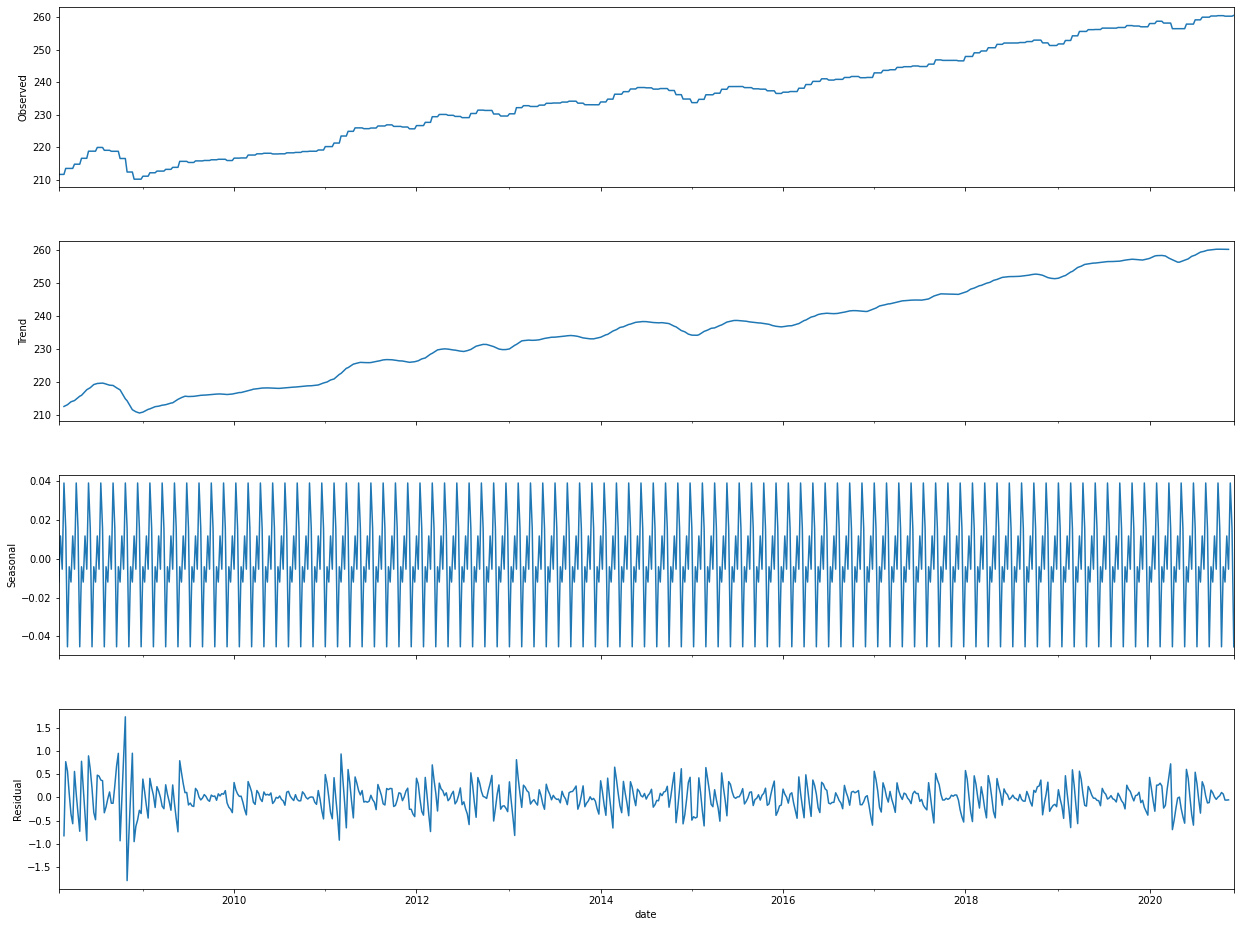

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_up['ACPI'], model='additive', freq =7)
# freq에 들어가는 주기는 계절성을 주기를 기반으로 설정해준다. 분기별은 4, 월별데이터는 12, 주별 패턴이 있는 일별 데이터는 7로 설정해서 보면서 맞춰가야함/1년이면 365)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20,15)

In [40]:
# 패턴이 보인다면 정상성이 의심된다. 이를 판단하기 위해서 ACF그래프 그려본다

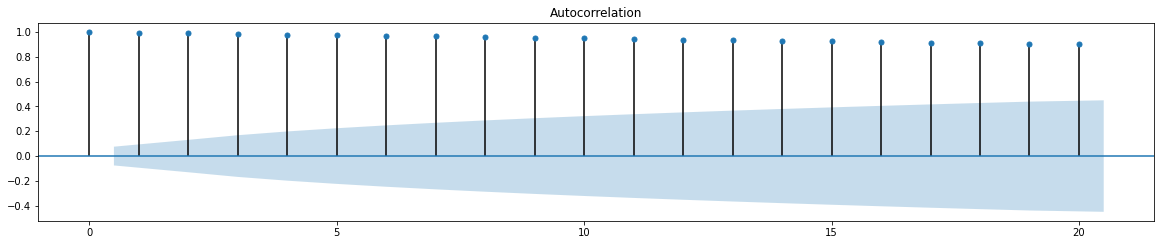

In [41]:
import statsmodels.api as sm

fig = plt.figure(figsize = (20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_up['ACPI'], lags=20, ax=ax1)

In [42]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_up['ACPI'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print ('Wt%s: %.3f' % (key, value))

ADF Statistic: -0.111795
p-value: 0.948251
Critical Values:
Wt1%: -3.440
Wt5%: -2.866
Wt10%: -2.569


In [43]:
# p-valu가 0.05를 넘으므로, 귀무가설을 기각하지 못한다. (정상성만족 x)
# 이를 해결하기 위해 1차 차분



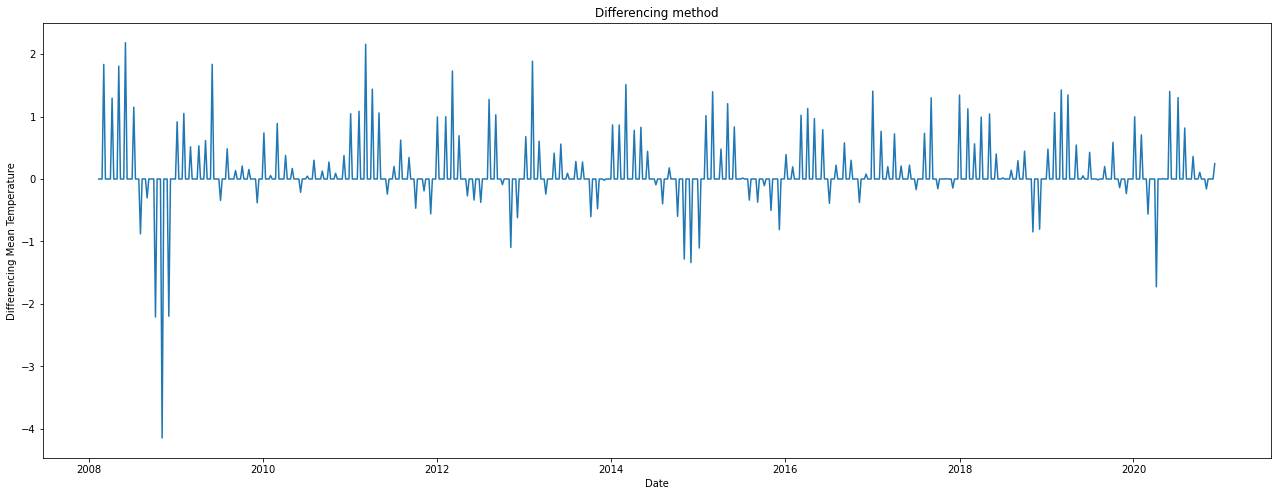

In [44]:
ts_diff = df_up['ACPI'] - df_up['ACPI'].shift()
plt.figure(figsize=(22,8))
plt.plot(ts_diff)
plt.title("Differencing method")
plt.xlabel("Date")
plt.ylabel("Differencing Mean Temperature")
plt.show()

In [45]:
result = adfuller(ts_diff[1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print ('Wt%s: %.3f' % (key, value))

ADF Statistic: -7.582357
p-value: 0.000000
Critical Values:
Wt1%: -3.440
Wt5%: -2.866
Wt10%: -2.569


In [49]:
df_price = pd.read_csv("/content/gdrive/My Drive/Black_coal/data/가격데이터.csv", encoding = 'utf-8-sig')

In [50]:
df_price

,Unnamed: 0,date,Coal_price,iron,Brent_fut,copper_fut,WTI_fut,WTI,Dubai,LNG_fut
0,0,2022-05-22,408.00,133.99,111.75,9453.5,110.98,112.44,107.17,136.67
1,1,2022-05-15,417.25,133.66,112.55,9422.0,113.23,112.04,107.21,147.96
2,2,2022-05-08,392.85,132.33,111.55,9159.0,110.49,110.30,107.23,148.45
3,3,2022-05-01,379.50,136.91,112.39,9414.5,109.77,110.95,107.57,137.50
4,4,2022-04-24,326.60,150.77,109.34,9769.5,104.69,104.78,102.79,163.68
...,...,...,...,...,...,...,...,...,...,...
698,698,2009-01-04,75.07,NaN,44.42,NaN,40.83,40.92,NaN,56.42
699,699,2008-12-28,74.01,NaN,46.91,NaN,46.34,46.16,NaN,54.74
700,700,2008-12-21,73.09,NaN,38.37,NaN,37.71,37.59,NaN,59.80
701,701,2008-12-14,73.29,NaN,44.00,NaN,33.87,35.89,NaN,59.11
